In [1]:
import os
import tqdm

import entries_extractor as ee

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
def number_of_unique_pairs(total: int) -> int:
    """
    `total-1` paths from the first, `total-2` from the second...
    """
    return total * (total - 1) / 2


def generate_report(library_path: str):
    import pandas as pd

    leaves = 0
    entries = 0
    paths = 0
    name_paths = 0
    max_leaves = 0
    max_entry = None
    functions = 0
    function_paths = 0
    entries_dir = os.path.join(library_path, "entries")
    log = open(os.path.join(library_path, "entries_stats.tsv"), "w", encoding="utf-8")
    log.write("file_name\tentry_type\tnum_nodes\tnum_edges\tnum_leaves\tnum_names")

    labels_dict = {}
    with open(os.path.join(library_path, "nodes.tsv"), "r", encoding="utf-8") as f:
        f.readline()
        for line in f:
            parts = line.split("\t")
            labels_dict[str(parts[0])] = eval(parts[1])

    print("Calculating total number of paths...")
    for file in tqdm.tqdm(os.listdir(entries_dir)):
        if not file.endswith(".dag"):
            continue
        entries += 1
        entry_nodes = 0
        entry_edges = 0
        entry_leaves = 0
        entry_names = 0
        with open(os.path.join(entries_dir, file), "r", encoding="utf-8") as f:
            f.readline()  # id, type, description, children ids
            name = None
            for line in f:
                entry_nodes += 1
                parts = line.split("\t")
                node_type = parts[1]
                node_children = eval(parts[3])

                if not node_children:
                    leaves += 1
                    entry_leaves += 1
                else:
                    entry_edges += len(node_children)
                if node_type == ":name":
                    if not name:
                        name = str(parts[2]).replace('"', "")
                    entry_names += 1

        entry_type = labels_dict[name]["label"].replace(":", "")

        if entry_type == "function":
            functions += 1
            function_paths += number_of_unique_pairs(entry_leaves)
            # if function_paths_carry >= BILLION:
            #     function_paths_billions += function_paths_carry // BILLION
            #     function_paths_carry = function_paths_carry % BILLION

        log.write(
            f"\n{file}\t{entry_type}\t{entry_nodes}\t{entry_edges}\t{entry_leaves}\t{entry_names}"
        )
        paths += number_of_unique_pairs(entry_leaves)
        name_paths += number_of_unique_pairs(entry_names)
        # if paths_carry >= BILLION:
        #     paths_billions += paths_carry // BILLION
        #     paths_carry = paths_carry % BILLION
        # if name_paths_carry >= BILLION:
        #     name_paths_billions += name_paths_carry // BILLION
        #     name_paths_carry = name_paths_carry % BILLION
        if entry_leaves > max_leaves:
            max_leaves = entry_leaves
            max_entry = file

    log.close()

    print("Making numbers printable...")
    paths_power = 0
    name_paths_power = 0
    function_paths_power = 0
    while paths > 10:
        paths_power += 1
        paths = paths // 10
    while name_paths > 10:
        name_paths_power += 1
        name_paths = name_paths // 10
    while function_paths > 10:
        function_paths_power += 1
        function_paths = function_paths // 10

    print(
        "-------REPORT-------",
        "\nTotal number of leaves: ",
        leaves,
        f"\n\tOn average {leaves / entries} leaves for each entry.",
        "\n\tMax leaves: ",
        max_leaves,
        "\n\tEntry with most leaves: ",
        max_entry,
        f"\nTotal paths (billions): {paths} * 10^{paths_power}",
        f"\nTotal paths between :name entries (billions): {name_paths} * 10^{name_paths_power}",
        f"\nTotal paths in :function entries (billions): {function_paths} * 10^{function_paths_power}",
        "\n\tTotal :function entries: ",
        functions,
    )

In [2]:
entries_stats = pd.read_csv("./data/raw/stdlib/entries_stats.tsv", sep="\t")
entries_stats

,file_name,entry_type,num_nodes,num_edges,num_leaves,num_names
0,Relation.Binary.Bundles_0236.dag,function,224,223,101,19
1,Algebra.Lattice.Structures_0219.dag,function,537,536,246,19
2,Algebra.Bundles_1163.dag,function,275,274,123,15
3,Function.Related.TypeIsomorphisms_0015.dag,function,174,173,90,14
4,Relation.Binary.Lattice.Structures_0119.dag,function,487,486,224,21
...,...,...,...,...,...,...
16478,Algebra.Morphism.Structures_0939.dag,record,278,277,132,18
16479,Algebra.Solver.Ring.AlmostCommutativeRing_0184...,function,306,305,134,28
16480,Data.Maybe.Properties_0016.dag,function,246,245,96,13
16481,Algebra.Morphism.Structures_0759.dag,record,239,238,105,15


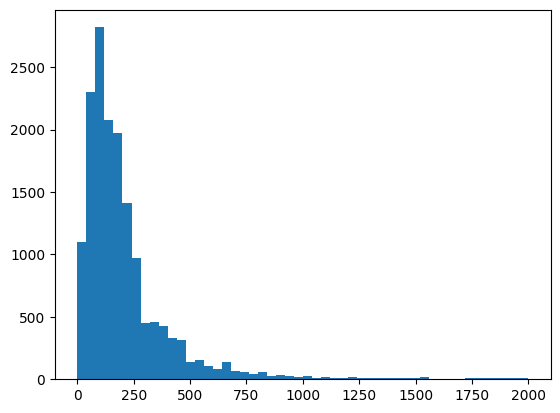

In [3]:
_ = plt.hist(
    entries_stats["num_leaves"],
    bins=50,
    range=(0, 2000),
    # log=True,
)

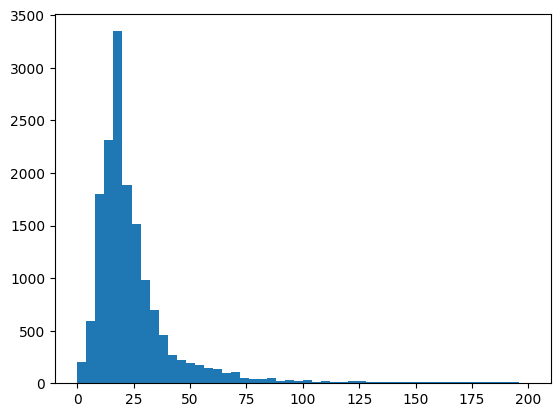

In [4]:
_ = plt.hist(
    entries_stats["num_names"],
    bins=50,
    range=(0, 200),
    # log=True,
)

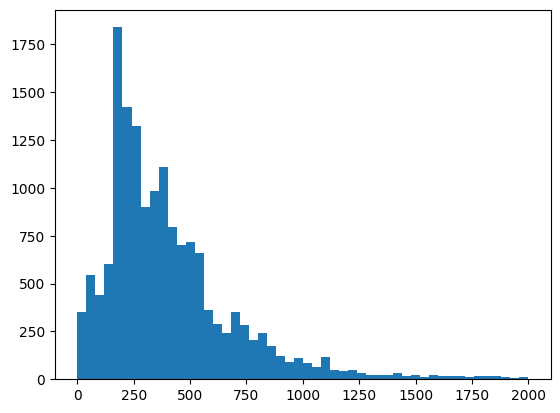

In [5]:
_ = plt.hist(
    entries_stats["num_nodes"],
    bins=50,
    range=(0, 2000),
    # log=True,
)

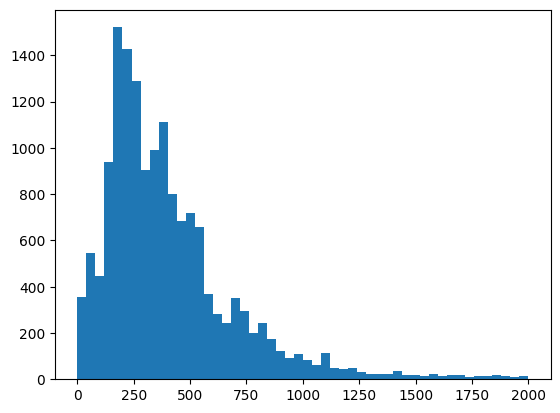

In [6]:
_ = plt.hist(
    entries_stats["num_edges"],
    bins=50,
    range=(0, 2000),
    # log=True,
)

In [7]:
function_entries = entries_stats[entries_stats["entry_type"] == "function"].drop(
    "entry_type", axis=1
)
function_entries

,file_name,num_nodes,num_edges,num_leaves,num_names
0,Relation.Binary.Bundles_0236.dag,224,223,101,19
1,Algebra.Lattice.Structures_0219.dag,537,536,246,19
2,Algebra.Bundles_1163.dag,275,274,123,15
3,Function.Related.TypeIsomorphisms_0015.dag,174,173,90,14
4,Relation.Binary.Lattice.Structures_0119.dag,487,486,224,21
...,...,...,...,...,...
16476,Algebra.Morphism.Structures_0125.dag,1048,1047,610,62
16477,Algebra.Solver.Ring.Lemmas_0015.dag,3365,3364,2031,345
16479,Algebra.Solver.Ring.AlmostCommutativeRing_0184...,306,305,134,28
16480,Data.Maybe.Properties_0016.dag,246,245,96,13


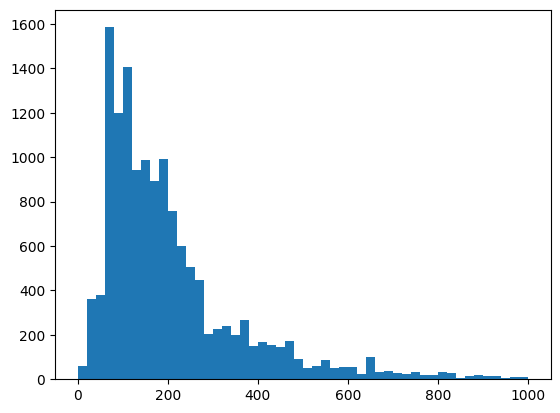

In [8]:
_ = plt.hist(
    function_entries["num_leaves"],
    bins=50,
    range=(0, 1000),
)

In [9]:
def count_tokens_in_file(file_path: str):
    entry_counts = {
        "entry": [],
        "label parts": [],
        "non-empty contexts": [],
        "empty contexts": [],
        "empty label subtokens": [],
        "empty context subtokens": [],
    }
    token_counts = {
        "entry": [],
        "left": [],
        "path": [],
        "right": [],
        "problems": [],
    }
    with open(file_path, "r", encoding="utf-8") as f:
        for line_number, line in tqdm.tqdm(enumerate(f)):
            line_number += 1
            parts = line.strip("\n").split(" ")
            label_parts = parts[0].split("|")

            entry_counts["entry"].append(line_number)
            entry_counts["label parts"].append(len(label_parts))
            entry_counts["non-empty contexts"].append(len(parts) - 1)
            entry_counts["empty contexts"].append(0)
            entry_counts["empty label subtokens"].append(0)
            entry_counts["empty context subtokens"].append(0)

            for subtoken in label_parts:
                if subtoken == "":
                    entry_counts["empty label subtokens"][-1] += 1

            for i, context in enumerate(parts[1:]):
                if context == "":
                    entry_counts["non-empty contexts"][-1] = i
                    entry_counts["empty contexts"][-1] = len(parts) - 1 - i
                    break
                subparts = context.split(",")
                if len(subparts) < 3:
                    token_counts["entry"].append(line_number)
                    token_counts["left"].append(0)
                    token_counts["path"].append(0)
                    token_counts["right"].append(0)
                    token_counts["problems"].append(str(subparts))
                left, path, right = subparts[:3]
                # If there's an error in the data - an aditional comma - there could be more parts
                problems = subparts[3:]

                left_parts = left.split("|")
                path_nodes = path.split("|")
                right_parts = right.split("|")

                for part in left_parts:
                    if part == "":
                        entry_counts["empty context subtokens"][-1] += 1
                for part in right_parts:
                    if part == "":
                        entry_counts["empty context subtokens"][-1] += 1

                token_counts["entry"].append(line_number)
                token_counts["left"].append(len(left_parts))
                token_counts["path"].append(len(path_nodes))
                token_counts["right"].append(len(right_parts))
                token_counts["problems"].append(str(problems))
    return pd.DataFrame(entry_counts), pd.DataFrame(token_counts)

In [10]:
entry_counts, token_counts = count_tokens_in_file("./data/code2seq/stdlib/predict.c2s")

16483it [00:13, 1251.87it/s]


In [11]:
entry_counts

,entry,label parts,non-empty contexts,empty contexts,empty label subtokens,empty context subtokens
0,1,10,109,891,0,0
1,2,10,264,736,0,0
2,3,8,181,819,0,0
3,4,6,96,904,0,0
4,5,10,1000,0,0,0
...,...,...,...,...,...,...
16478,16479,3,15,985,0,0
16479,16480,12,200,800,0,0
16480,16481,10,200,800,0,0
16481,16482,11,200,800,0,0


In [12]:
entry_counts[entry_counts["empty context subtokens"] != 0]

,entry,label parts,non-empty contexts,empty contexts,empty label subtokens,empty context subtokens


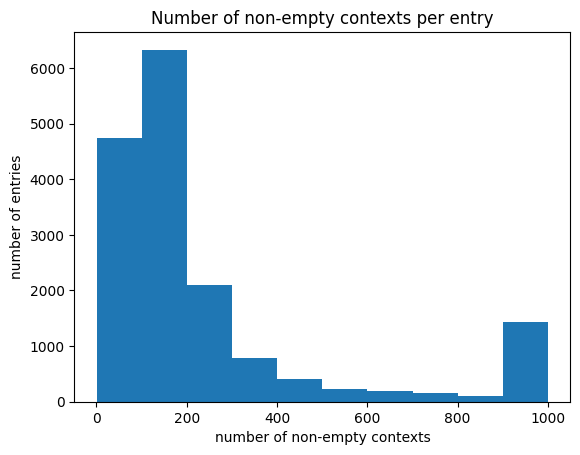

In [13]:
plt.hist(entry_counts["non-empty contexts"])
plt.title("Number of non-empty contexts per entry")
plt.xlabel("number of non-empty contexts")
plt.ylabel("number of entries")
print()

In [14]:
entry_counts[entry_counts["non-empty contexts"] == 0]["entry"]

Series([], Name: entry, dtype: int64)

3

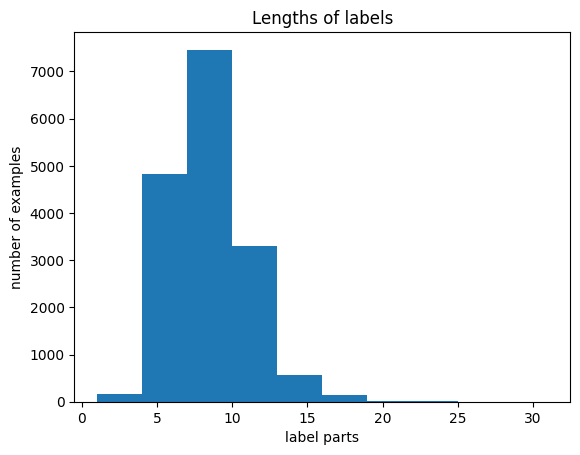

In [15]:
plt.hist(entry_counts["label parts"])
plt.title("Lengths of labels")
plt.xlabel("label parts")
plt.ylabel("number of examples")
entry_counts["label parts"][entry_counts["label parts"] == 1].count()

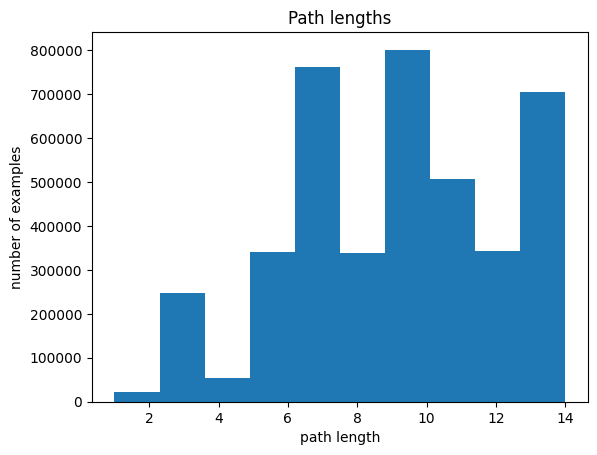

In [16]:
plt.hist(token_counts["path"])
plt.title("Path lengths")
plt.xlabel("path length")
plt.ylabel("number of examples")
print()

In [24]:
print("Quantiles:", token_counts["path"].quantile([0.6, 0.7, 0.8, 0.9]), sep="\n")

Quantiles:
0.6    10.0
0.7    11.0
0.8    12.0
0.9    13.0
Name: path, dtype: float64


In [18]:
left = pd.DataFrame({"entry": token_counts["entry"], "parts": token_counts["left"]})
right = pd.DataFrame({"entry": token_counts["entry"], "parts": token_counts["right"]})

tokens = pd.concat([left, right], ignore_index=True)
combined_tokens = tokens["parts"]

In [19]:
print(
    "Min token length:",
    np.min(combined_tokens),
    "Max token length:",
    np.max(combined_tokens),
    "Mean token length:",
    np.mean(combined_tokens),
    "Median token length:",
    np.median(combined_tokens),
    "Token length quantiles 0.9, 0.99:",
    np.quantile(combined_tokens, [0.9, 0.99]),
    # np.percentile(combined_tokens, 0.9),
    "Percentage of empty tokens:",
    float(combined_tokens[combined_tokens <= 0].count()) / len(combined_tokens),
    "Number of empty tokens:",
    int(combined_tokens[combined_tokens <= 0].count()),
    "Percentage of tokens of length less than 2:",
    float(combined_tokens[combined_tokens <= 2].count()) / len(combined_tokens),
    "Percentage of tokens of length less than 3:",
    float(combined_tokens[combined_tokens <= 3].count()) / len(combined_tokens),
    "Percentage of tokens of length less than 4:",
    float(combined_tokens[combined_tokens <= 4].count()) / len(combined_tokens),
    sep="\n",
)

Min token length:
1
Max token length:
23
Mean token length:
1.7107330866319925
Median token length:
1.0
Token length quantiles 0.9, 0.99:
[3. 5.]
Percentage of empty tokens:
0.0
Number of empty tokens:
0
Percentage of tokens of length less than 2:
0.7841292851003074
Percentage of tokens of length less than 3:
0.9542373869083174
Percentage of tokens of length less than 4:
0.9802658352637228


In [20]:
entries_with_empty_tokens = tokens[tokens["parts"] == 0].groupby(["entry"]).count()
entries_with_empty_tokens

,parts
entry,


In [21]:
token_counts[(token_counts["left"] == 0) | (token_counts["right"] == 0)][
    ["entry", "problems"]
]

,entry,problems
